<a href="https://colab.research.google.com/github/PiyushKyushu/COVID-19-News/blob/main/India_COVID_19_Top2Vec_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import json
import os
import ipywidgets as widgets
from IPython.display import clear_output, display
from top2vec import Top2Vec

In [ ]:
data = pd.read_csv("No_Duplicate_India_Articles.csv")
data.head()

,Date,Headline,Articles
0,"Updated: Apr 17, 2020 17:43 IST",Maharashtra govt orders landlords to not evict...,['The Maharashtra government on Friday ordered...
1,"Updated: Apr 17, 2020 17:16 IST",‘Examine ‘referral chain’ to investigate risin...,['PUNE: The abrupt transfer of the dean of BJ ...
2,"Updated: Apr 17, 2020 17:20 IST","In lockdown, UP Higher Education department us...",['Uttar Pradesh’s\xa0Higher Education departme...
3,"Updated: Apr 17, 2020 17:06 IST",News updates from Hindustan Times: In lockdown...,"['Here are today’s top news, analysis and opin..."
4,"Updated: Apr 17, 2020 17:07 IST",Covid-19: UK to operate 17 more flights for st...,['The UK announced on Friday it will operate 1...


In [ ]:
# top2vec = Top2Vec(documents=data.Articles, speed="deep-learn", workers=4)

In [ ]:
# top2vec.save("India_Covid-19_Top2Vec_model")

In [ ]:
top2vec = Top2Vec.load("India_Covid-19_Top2Vec_model")

In [ ]:
top2vec.get_num_topics()

402

In [ ]:
topic_sizes, topic_nums = top2vec.get_topic_sizes()
print(topic_sizes)
print("-----------------")
print(topic_nums)

[1278  658  623  610  605  500  431  423  388  380  342  341  334  332
  319  317  312  309  306  299  290  286  268  265  265  262  256  255
  255  253  250  245  239  234  230  228  227  226  226  225  225  224
  219  217  216  216  214  211  209  209  209  205  202  202  199  198
  197  197  195  191  191  187  185  183  181  178  177  175  175  173
  173  169  168  167  165  165  165  165  165  164  164  162  159  159
  157  156  155  154  152  151  151  151  150  150  150  150  149  149
  146  144  143  143  143  141  141  140  138  136  135  134  134  133
  133  133  132  131  131  130  129  129  129  128  128  127  126  125
  124  124  123  123  122  122  122  120  120  119  118  118  117  116
  116  115  115  114  114  114  113  113  113  113  112  111  111  111
  109  109  109  109  108  108  108  107  107  106  106  106  104  104
  104  104  103  102  101  101  101  101  100  100  100   99   99   99
   98   98   97   96   96   95   94   94   94   93   92   92   92   91
   91 

In [ ]:
topic_words, word_scores, topic_nums = top2vec.get_topics(402)
print(topic_words)

[['cricket' 'odis' 'odi' ... 'sunrisers' 'dravid' 'played']
 ['trump' 'democrat' 'americans' ... 'connecticut' 'tennessee' 'capitol']
 ['ludhiana' 'jalandhar' 'faridkot' ... 'balwinder' 'sandhu' 'baldev']
 ...
 ['fest' 'creators' 'personalities' ... 'something' 'studded' 'digital']
 ['dgca' 'refund' 'airlines' ... 'cji' 'submissions' 'plea']
 ['walt' 'disney' 'orlando' ... 'theater' 'marvel' 'utah']]


In [ ]:
topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=["tests"], num_topics=5)
print(topic_words)
print("----------")
print(word_scores)
print("----------")
print(topic_scores)
print("----------")
print(topic_nums)
print("----------")

[array(['icmr', 'pcr', 'rt', 'polymerase', 'confirmatory', 'rapid',
       'diagnostic', 'antigen', 'laboratories', 'testing', 'labs',
       'transcription', 'validated', 'kits', 'rtks', 'antibody', 'tests',
       'detection', 'detect', 'detecting', 'gangakhedkar', 'elisa',
       'negatives', 'reaction', 'reagents', 'laboratory', 'balram',
       'assay', 'truenat', 'detects', 'diagnosis', 'diagnose',
       'diagnostics', 'sensitivity', 'kit', 'specificity', 'sample',
       'molecular', 'test', 'niv', 'lab', 'srl', 'niced', 'samples',
       'rna', 'quicker', 'specimens', 'method', 'virology', 'accuracy'],
      dtype='<U15'), array(['tpr', 'positivity', 'rate', 'fatality', 'cumulative', 'doubling',
       'mortality', 'antigen', 'decreasing', 'tests', 'samples',
       'detection', 'rt', 'positives', 'gurugram', 'testing', 'pcr',
       'bulletins', 'undetected', 'virender', 'surveillance', 'trend',
       'bulletin', 'active', 'confirmatory', 'backlog', 'idsp',
       'symptomat

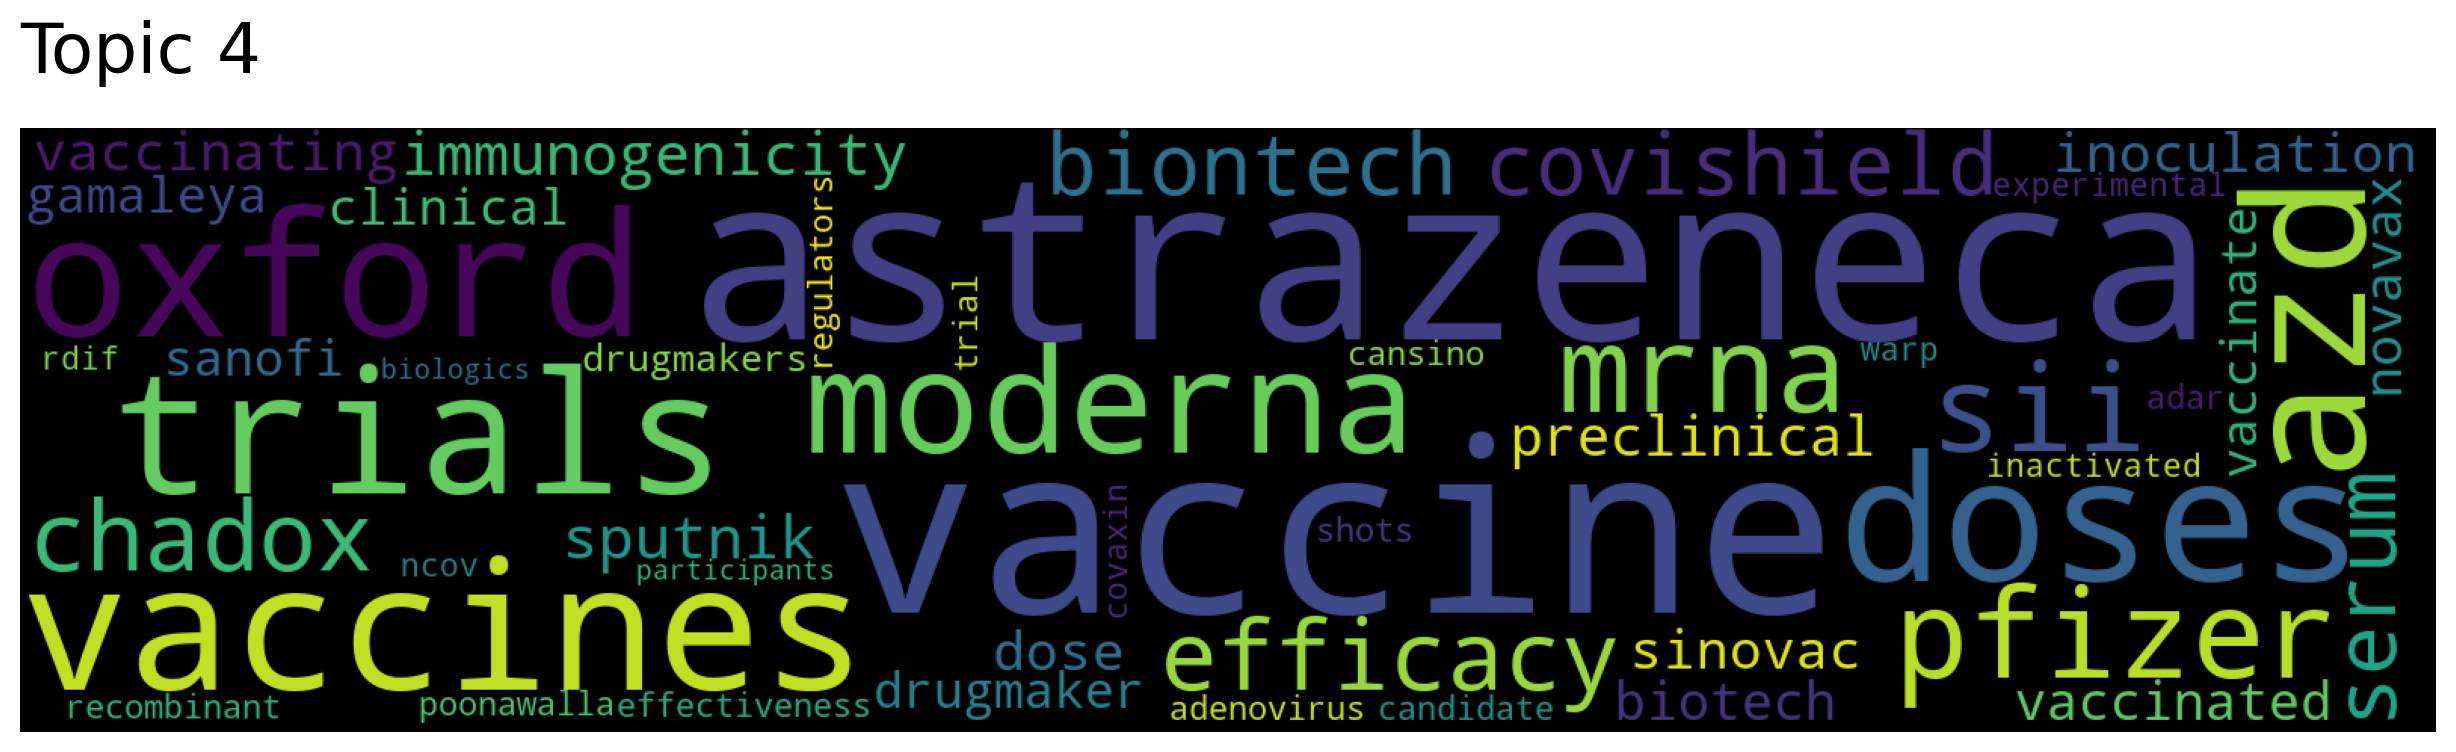

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=["Vaccine"], num_topics=1)
for topic in topic_nums:
    top2vec.generate_topic_wordcloud(topic)

In [ ]:
documents, document_scores, document_ids = top2vec.search_documents_by_topic(topic_num=9, num_docs=10)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 13751, Score: 0.5635799765586853
-----------
['In a bid to scale up testing and measure the spread of the coronavirus pandemic in Delhi, government and private hospitals in the capital have begun testing for Covid-19 using the antigen-based method  following the state government’s nod. ', 'Samples, however, will not be collected from homes for the antigen test as they need to be processed within an hour of collection. An antigen is a foreign molecule that induces an immune response in the body, especially the production of antibodies, and detecting its presence determines a present infection.', '“We started the antigen testing from Wednesday. The selection criterion depends on how quickly the results are needed as it is quicker than the RT-PCR test. If there’s time in hand, then we prefer testing through RT-PCR because if an antigen test is negative, one has to repeat the test through an RT-PCR,” said Dr Anupam Sibal, group medical director, Apollo Hospitals.', 'The Indian Co

In [ ]:
documents, document_scores, document_ids = top2vec.search_documents_by_keywords(keywords=["Shinzo", "Abe"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

In [ ]:
words, word_scores = top2vec.similar_words(keywords=["Syria"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")